## Исследование надежности заемщиков банка

#### Изучим общую информацию о данных. Импортируем библиотеку pandas и считаем данные из csv-файла в датафрейм`

In [29]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

### Выведим первые 20 строчек датафрейма `data` на экран.**

In [30]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


** Выведим основную информацию о датафрейме с помощью метода `info()`.**

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

#### Выведим количество пропущенных значений для каждого столбца

In [32]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

#### В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Другой столбец с пропущенными значениями — `total_income`

In [33]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

####  Обработаем значения: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [34]:
data['days_employed'] = data['days_employed'].abs()

#### Для каждого типа занятости выведим медианное значение трудового стажа `days_employed` в днях.

In [35]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

#### Выведим перечень уникальных значений столбца `children`.

In [36]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

#### В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [37]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

#### Ещё раз выведим перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [38]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

In [39]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [40]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [41]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [42]:
data['education'] = data['education'].str.lower()

In [43]:
data.duplicated().sum()

71

### Категоризация данных

#### На основании диапазонов, указанных ниже, создим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


In [44]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [45]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [46]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

#### Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [47]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [48]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследуем данные

In [49]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
members_in_group=data.groupby('children')['debt'].count()
number_of_delays=data.groupby('children')['debt'].sum()    
data.groupby('children')['debt'].agg(['sum', 'count']).assign(dept_perc=(number_of_delays/members_in_group).map('{:.1%}'.format))

,sum,count,dept_perc
children,,,
0,1063,14149,7.5%
1,444,4818,9.2%
2,194,2055,9.4%
3,27,330,8.2%
4,4,41,9.8%
5,0,9,0.0%


**Вывод:** 
Существенной зависимости между количеством детей и возвратом кредита в срок нет. Процент людей, имеющих просрочки по кредиту, распределен равномено. Нулевой процент наблюдается только у группы, имеющих 5 детей. В силу своей малочисленности данная группа нерепрезентативна. Люди без детей реже становятся должниками.

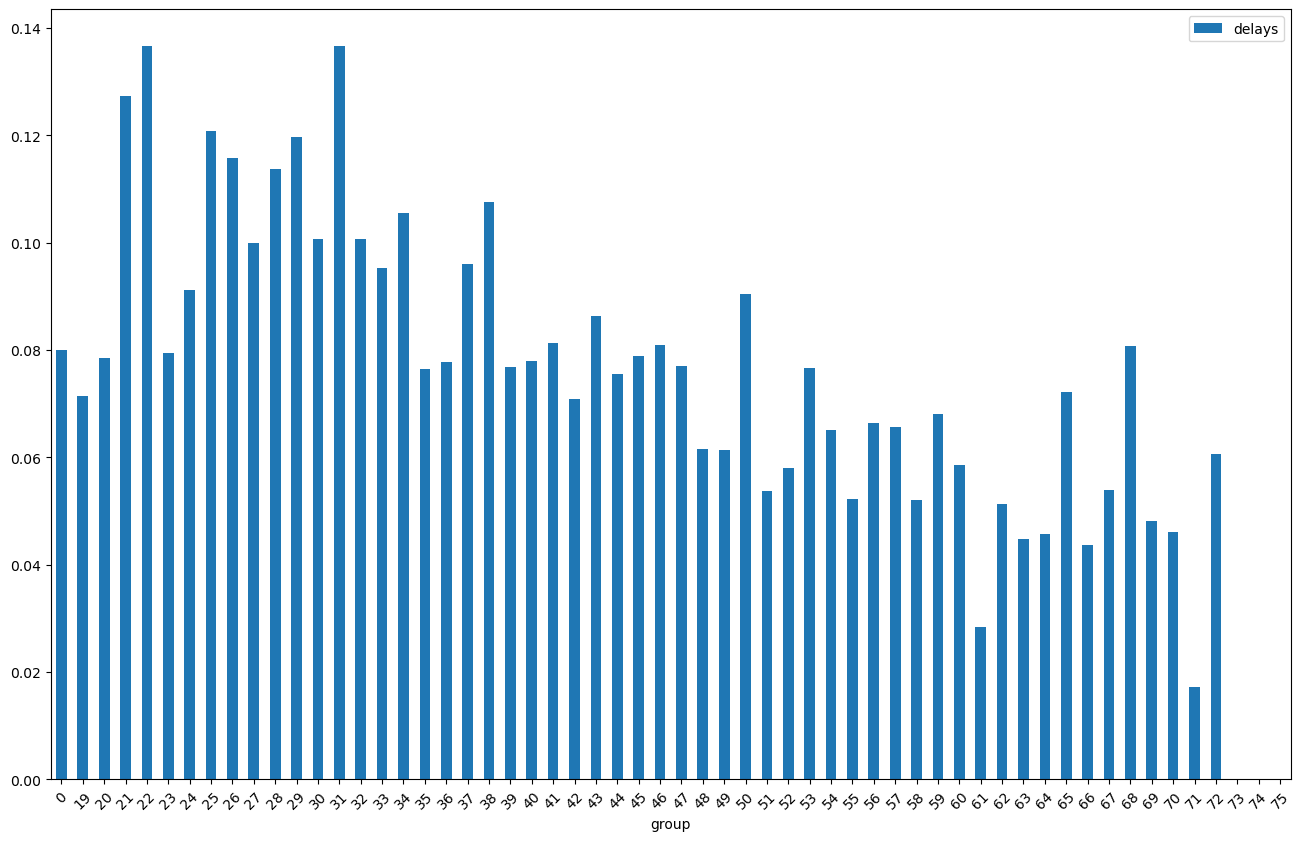

In [50]:
import matplotlib.pyplot as plt
age_group=data.groupby('dob_years')['dob_years'].count()
number_of_delays=data.groupby('dob_years')['debt'].sum()
percentage_delay=number_of_delays/age_group
percentage_delay=pd.DataFrame({'group':percentage_delay.index, 'delays':percentage_delay.values})
ax = percentage_delay.plot.bar(x='group', y='delays', rot=45, figsize=(16, 10))


In [51]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
family_status=data.groupby('family_status')['family_status'].count()
debt_family_status=data.groupby('family_status')['debt'].sum()
percent_debt_family_status=debt_family_status/family_status
#print(percent_debt_family_status)

data.groupby('family_status')['debt'].agg(['sum', 'count']).assign(dept_perc=(debt_family_status/family_status).map('{:.1%}'.format))

,sum,count,dept_perc
family_status,,,
Не женат / не замужем,273,2799,9.8%
в разводе,84,1189,7.1%
вдовец / вдова,63,952,6.6%
гражданский брак,385,4160,9.3%
женат / замужем,927,12302,7.5%


**Вывод:** Не женатые люди и в гражданском браке чаще становятся должниками. Остальные группы распределены равномерно. Женатых людей примерно 50% от всей выборки. 

In [52]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
income_level=data.groupby('total_income_category')['total_income_category'].count()
income_level_debt=data.groupby('total_income_category')['debt'].sum()
perc_income_level_debt=income_level_debt/income_level
data.groupby('total_income_category')['debt'].agg(['sum', 'count']).assign(dept_perc=(income_level_debt/income_level).map('{:.1%}'.format))

,sum,count,dept_perc
total_income_category,,,
A,2,25,8.0%
B,354,5014,7.1%
C,1353,15992,8.5%
D,21,349,6.0%
E,2,22,9.1%


**Вывод:** Три группы людей с доходом менее 30 тыс.руб/месяц, от 30 до 50 тыс. и более 1 млн. руб/мес не обладают достаточным объёмом для написания объективных выводов. Высокий процент должников наблюдается в группе с доход от 50 до 200 тыс. 

In [53]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
purpose_count=data.groupby('purpose_category')['purpose_category'].count()
purpose_count_debt=data.groupby('purpose_category')['debt'].sum()
percent_purpose_count_debt=purpose_count_debt/purpose_count
data.groupby('purpose_category')['debt'].agg(['sum', 'count']).assign(dept_perc=(purpose_count_debt/purpose_count).map('{:.1%}'.format))

,sum,count,dept_perc
purpose_category,,,
операции с автомобилем,400,4288,9.3%
операции с недвижимостью,780,10780,7.2%
получение образования,369,3997,9.2%
проведение свадьбы,183,2337,7.8%


**Вывод:** Реже становятся должниками те, кто берет кредит на свадьбу и недвижимость. Повышены риски просрочек имеют кредитные операции с автомобилем и образованием 

#### Источники недостоверной информации: 
- неверный ввод данных, искажение информации, повреждение повреждение при сохранении данных, технические проблемы, человеческий фактор, преднамеренное введение в заблуждение или искажение информации

### Общий вывод.

В результате проведнного анализа данных, следует сделать следующие выводы. 

Наличие детей повышает вероятность просрочки по кредиту. Не женатые и люди, живущие в гражденском браке чаще становятся должниками. Повышены риски просрочек имеют кредитные операции с автомобилем и образованием. Высокий процент должников наблюдается в группе с доходом от 50 до 200 тыс.

Для увеличения результативности исследований рекомендую выдавать больше кредитов семьям, в которых более 5 детей, бедным людям с доходом менее 30 тыс/мес и богачам с доходом более 1 млн, поскольку в настоящее время объёмы групп не позволяют делать по ним какие либо значимые выводы.     

В данных выявленно огромное количество пропусков и некорректных значений. Причинами появления пропусков в данных могут быть: 
некорректный ввод данных, преднамеренное искажение информации, повреждение при сохранении данных, технические проблемы, человеческий фактор, преднамеренное введение в заблуждении.

Заполнение пропусков для количественных переменных медианой является лучшим решением из-за устойчивости медианы к выбросам и аномальным значениям.